In [2]:
#Importing the required python libraries
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [4]:
#Reading and importing the training and testing datasets
train=pd.read_csv('train.csv')
train_x=train.iloc[:,0].values
train_y=train.iloc[:,1].values
test=pd.read_csv('test.csv')
test_x=test.iloc[:,0].values
test_y=test.iloc[:,1].values

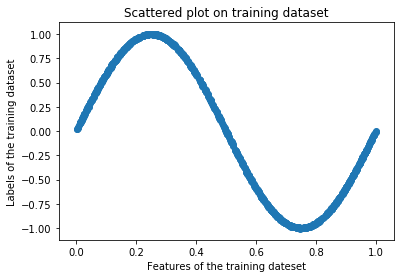

In [6]:
#plotting the scattered points of training dataset and saving it
plt.scatter(train_x,train_y)
plt.xlabel('Features of the training dateset')
plt.ylabel('Labels of the training dataset')
plt.title('Scattered plot on training dataset')
plt.savefig('Scattered plot on training dateset.png')

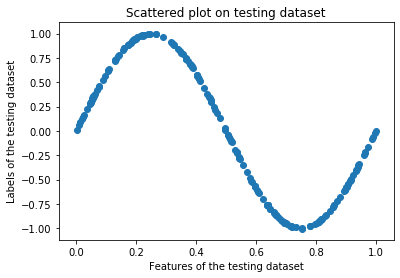

In [7]:
#plotting the scattered points of testing dataset and saving it
plt.scatter(test_x,test_y)
plt.xlabel('Features of the testing dataset')
plt.ylabel('Labels of the testing dataset')
plt.title('Scattered plot on testing dataset')
plt.savefig('Scattered plot on testing dateset.png')

In [8]:
def x_polynomial(n,x):
    x_nom=[]
    for i in range(len(x)):
        p=[]
        for j in range(n+1):
            p+=[x[i]**j]
        x_nom.append(p)
    return np.array(x_nom)

In [9]:
def hypothesis(theta,x):
    return np.dot(x,theta)

In [10]:
def min_squ_error(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    error=np.mean((ans-y)**2)
    error/=2
    return error

In [11]:
def gradient_descent(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    ans-=y
    ans= x.transpose()*ans
    return np.mean(ans,axis=1)

In [12]:
def regression(theta,x,y,alpha,cutoff=1e-6):
    error1=0
    while True:
        next_error=min_squ_error(theta,x,y)
        if abs(next_error-error1)<=cutoff:
            break
        error1=next_error
        gradient=alpha*gradient_descent(theta,x,y)
        theta=np.subtract(theta, gradient)
    return theta

[ 0.88763351 -1.80430867]


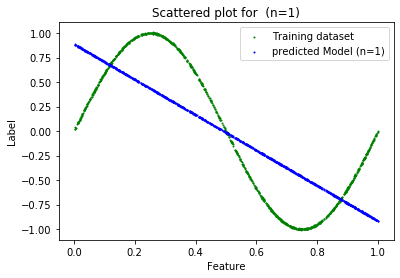

[ 0.782224   -1.11666483 -0.69741809]


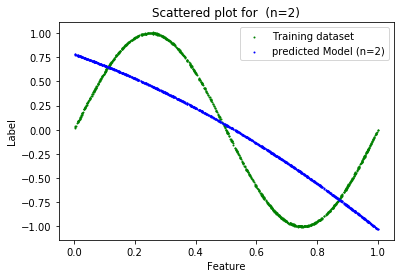

[ 0.98750349 -1.77740575 -1.60592725  1.68190348]


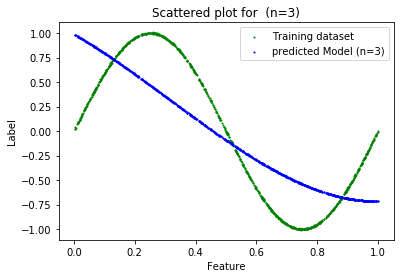

[ 0.73744405  1.11395735 -6.17220352 -1.41165198  5.51950808]


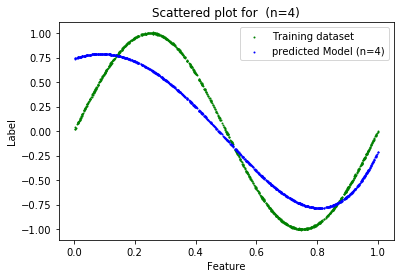

[ 0.65178655  1.66185269 -5.81364882 -2.44066755  1.7838035   4.19999671]


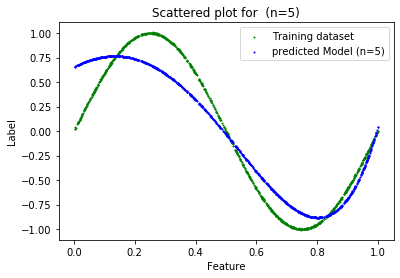

[ 0.6517996   1.44385668 -4.74558668 -2.46592249 -0.33996206  3.31285329
  2.33546558]


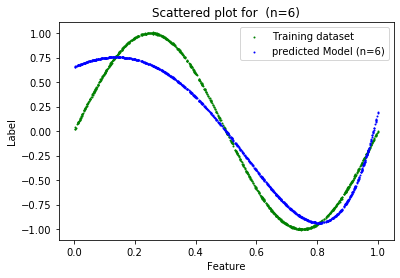

[ 0.73140028  0.3685282  -2.242116   -2.00358489 -2.32018748  0.08140871
  3.34168353  2.40088436]


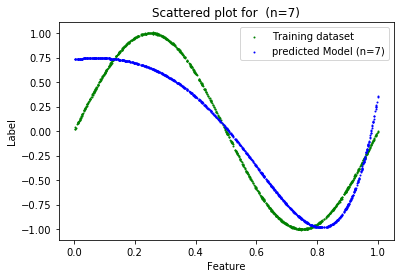

[ 0.6959646   0.94960725 -4.17936833 -0.77800922 -0.7910262   0.31323568
  1.24777666  1.03561544  1.88471462]


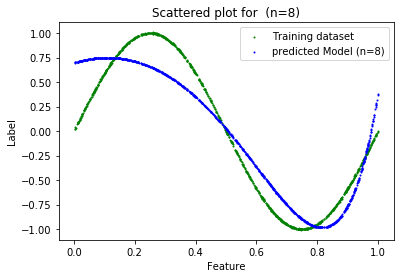

[ 0.73994968  0.41440854 -2.9812104  -0.89663178 -1.9894247   1.71600404
  0.46221505 -0.50453146  2.1952811   1.30233884]


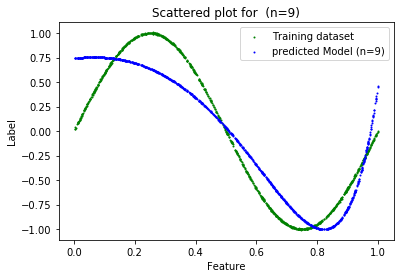

[0.09535781652730874, 0.09708264238948053, 0.08481987420759105, 0.038824568423654206, 0.02687560125521282, 0.025485013404984613, 0.031488027306765, 0.030085872004178244, 0.034391356321514376]


<Figure size 432x288 with 0 Axes>

In [28]:
train_error=[]
test_error=[]
for i in [1,2,3,4,5,6,7,8,9]:
    x1_train=x_polynomial(i,train_x)
    x1_test=x_polynomial(i,test_x)
    coef=np.random.randn(i+1)
    theta=regression(coef,x1_train,train_y,0.05)
    print(theta)
    train_error.append(np.mean((np.dot(x1_train, theta) - train_y)**2)/2)
    test_error.append(np.mean((np.dot(x1_test, theta) - test_y)**2)/2)
    plt.scatter(train_x,train_y,color='green',marker='o',label='Training dataset',s=1)
    plt.scatter(train_x,np.dot(x1_train, theta),color='blue',marker='o',label='predicted Model (n='+str(i)+')',s=1)
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.legend()
    plt.title('Scattered plot for  (n='+str(i)+')')
    plt.savefig('Scattered plot on predicted values for Model (n='+str(i)+') .png')
    plt.show()
    plt.clf()
print(test_error)